In [ ]:
import pandas as pd
import random

# Define parameters
business_types = ['Cafe', 'Gym', 'Salon', 'Restaurant', 'Electronics', 'Clothing Store', 'Bookstore', 'Pharmacy']
cities = [
    ("Delhi", 28.6, 77.2, 9500, 52000),
    ("Mumbai", 19.0, 72.8, 8800, 47000),
    ("Jaipur", 26.9, 75.8, 5600, 32000),
    ("Raipur", 21.2, 81.6, 6100, 35000),
    ("Ahmedabad", 23.0, 72.6, 7200, 40000),
    ("Bangalore", 12.9, 77.5, 9900, 58000),
    ("Chennai", 13.1, 80.2, 9100, 50000),
    ("Kolkata", 22.6, 88.4, 8900, 45000),
    ("Pune", 18.5, 73.8, 8700, 46000),
    ("Lucknow", 26.8, 80.9, 5400, 31000)
]

# Generate dataset
rows = []
for _ in range(300):
    city, lat, lon, pop_density, income = random.choice(cities)
    business_type = random.choice(business_types)
    shop_density = random.randint(20, 150)

    # Simulate success_score using a weighted function
    score = (
        (0.3 * (pop_density / 10000)) +
        (0.3 * (income / 60000)) +
        (0.2 * (150 - shop_density) / 150) +
        (0.2 * random.uniform(0.8, 1.2))
    ) * 100
    score = round(min(max(score, 0), 100), 2)

    rows.append({
        "city": city,
        "lat": round(lat + random.uniform(-0.05, 0.05), 4),
        "lon": round(lon + random.uniform(-0.05, 0.05), 4),
        "business_type": business_type,
        "pop_density": pop_density,
        "income": income,
        "shop_density": shop_density,
        "success_score": score
    })

# Save to CSV
df = pd.DataFrame(rows)
csv_path = "dummy_geo_business_data_v2.csv"
df.to_csv(csv_path, index=False)
csv_path


'dummy_geo_business_data_v2.csv'

# Task
Analyze the provided dataset to predict the `success_score` using multiple machine learning models (RandomForestRegressor, XGBoostRegressor, LinearRegression, SVR), evaluate their performance using R² Score, Mean Absolute Error, Mean Squared Error, and cross-validation, and visualize the results with a bar chart of R² scores and a line plot of predicted vs actual success_score.

## Load data

### Subtask:
Load the data from the generated CSV file into a pandas DataFrame.


**Reasoning**:
Load the data from the generated CSV file into a pandas DataFrame and display the first few rows.



In [ ]:
df = pd.read_csv(csv_path)
df.head()

,city,lat,lon,business_type,pop_density,income,shop_density,success_score
0,Bangalore,12.9054,77.5362,Gym,9900,58000,33,95.04
1,Bangalore,12.9273,77.4670,Bookstore,9900,58000,52,91.56
2,Raipur,21.1635,81.5715,Restaurant,6100,35000,118,59.06
3,Jaipur,26.9369,75.7807,Clothing Store,5600,32000,122,53.89
4,Kolkata,22.6128,88.4256,Bookstore,8900,45000,137,71.26


## Prepare data

### Subtask:
Prepare the data for training by separating features (X) and target variable (y). Also, handle categorical features using one-hot encoding.


**Reasoning**:
Prepare the data for model training by separating features and target, and applying one-hot encoding to the categorical feature.



In [ ]:
# Define features (X) and target variable (y)
X = df.drop(['success_score', 'city'], axis=1)
y = df['success_score']

# Apply one-hot encoding to the 'business_type' column
X = pd.get_dummies(X, columns=['business_type'], drop_first=True)

# Display the first few rows of the processed feature DataFrame (X) and the target variable (y)
display(X.head())
display(y.head())

,lat,lon,pop_density,income,shop_density,business_type_Cafe,business_type_Clothing Store,business_type_Electronics,business_type_Gym,business_type_Pharmacy,business_type_Restaurant,business_type_Salon
0,12.9054,77.5362,9900,58000,33,False,False,False,True,False,False,False
1,12.9273,77.4670,9900,58000,52,False,False,False,False,False,False,False
2,21.1635,81.5715,6100,35000,118,False,False,False,False,False,True,False
3,26.9369,75.7807,5600,32000,122,False,True,False,False,False,False,False
4,22.6128,88.4256,8900,45000,137,False,False,False,False,False,False,False


,success_score
0,95.04
1,91.56
2,59.06
3,53.89
4,71.26


## Split data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Import the necessary function for splitting the data and then split the data into training and testing sets.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (240, 12)
Shape of X_test: (60, 12)
Shape of y_train: (240,)
Shape of y_test: (60,)


## Train models

### Subtask:
Train the specified machine learning models (RandomForestRegressor, XGBoostRegressor, LinearRegression, SVR).


**Reasoning**:
Import the necessary machine learning model classes and train each model using the training data.



In [ ]:
%pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 3.4 MB/s eta 0:00:00


**Reasoning**:
Now that xgboost is installed, retry the model training step.



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Instantiate models
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)
lr_model = LinearRegression()
svr_model = SVR()

# Train models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)

print("Models trained successfully.")

Models trained successfully.


## Evaluate models

### Subtask:
Evaluate each trained model using R², Mean Absolute Error, and Mean Squared Error. Perform cross-validation on each model.


**Reasoning**:
Import the necessary metrics and cross-validation function, create a dictionary to store results, and iterate through the trained models to evaluate them and perform cross-validation, then print the results.



In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

# Create a dictionary to store the evaluation results
evaluation_results = {}

# Iterate through the trained models
models = {
    "RandomForestRegressor": rf_model,
    "XGBoostRegressor": xgb_model,
    "LinearRegression": lr_model,
    "SVR": svr_model
}

for model_name, model in models.items():
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    r2_test = r2_score(y_test, y_pred)
    mae_test = mean_absolute_error(y_test, y_pred)
    mse_test = mean_squared_error(y_test, y_pred)

    # Perform cross-validation (using R2 score as the metric)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_r2_mean = cv_scores.mean()

    # Store the results
    evaluation_results[model_name] = {
        "R2 Test": r2_test,
        "MAE Test": mae_test,
        "MSE Test": mse_test,
        "Cross-validation R2 (mean)": cv_r2_mean
    }

# Print the evaluation results
for model_name, metrics in evaluation_results.items():
    print(f"--- {model_name} ---")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("-" * (len(model_name) + 6))

--- RandomForestRegressor ---
R2 Test: 0.9339
MAE Test: 2.1009
MSE Test: 6.8145
Cross-validation R2 (mean): 0.9290
---------------------------
--- XGBoostRegressor ---
R2 Test: 0.9053
MAE Test: 2.6062
MSE Test: 9.7564
Cross-validation R2 (mean): 0.9197
----------------------
--- LinearRegression ---
R2 Test: 0.9509
MAE Test: 1.9478
MSE Test: 5.0613
Cross-validation R2 (mean): 0.9492
----------------------
--- SVR ---
R2 Test: 0.5968
MAE Test: 5.5328
MSE Test: 41.5467
Cross-validation R2 (mean): 0.5558
---------


## Compare models

### Subtask:
Compare the performance of the models based on the evaluation metrics.


**Reasoning**:
Create a DataFrame from the evaluation results, sort it by R2 Test score in descending order, and display it to compare model performance. Then summarize the findings.



In [ ]:
# Create a DataFrame from the evaluation results
evaluation_df = pd.DataFrame.from_dict(evaluation_results, orient='index')

# Sort the DataFrame by the 'R2 Test' column in descending order
evaluation_df_sorted = evaluation_df.sort_values(by='R2 Test', ascending=False)

# Display the sorted DataFrame
display(evaluation_df_sorted)

# Summarize the findings
print("\n--- Model Performance Summary (Sorted by R2 Test Score) ---")
best_model = evaluation_df_sorted.index[0]
worst_model = evaluation_df_sorted.index[-1]
print(f"Based on the R² test score, the best performing model is: {best_model}")
print(f"The worst performing model is: {worst_model}")
print("Other metrics (MAE, MSE, Cross-validation R2) also provide insights into model performance.")

,R2 Test,MAE Test,MSE Test,Cross-validation R2 (mean)
LinearRegression,0.950879,1.947818,5.061345,0.949157
RandomForestRegressor,0.933865,2.100850,6.814463,0.928980
XGBoostRegressor,0.905314,2.606164,9.756360,0.919666
SVR,0.596787,5.532823,41.546664,0.555845



--- Model Performance Summary (Sorted by R2 Test Score) ---
Based on the R² test score, the best performing model is: LinearRegression
The worst performing model is: SVR
Other metrics (MAE, MSE, Cross-validation R2) also provide insights into model performance.


## Visualize results

### Subtask:
Plot the R² scores of each model in a bar chart and a line plot of predicted vs actual success_score for one of the models.


**Reasoning**:
Plot the R² scores from the evaluation results and the predicted vs actual success score for the best performing model.



<ipython-input-14-12d2464df309>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=evaluation_df_sorted.index, y='R2 Test', data=evaluation_df_sorted, palette='viridis')


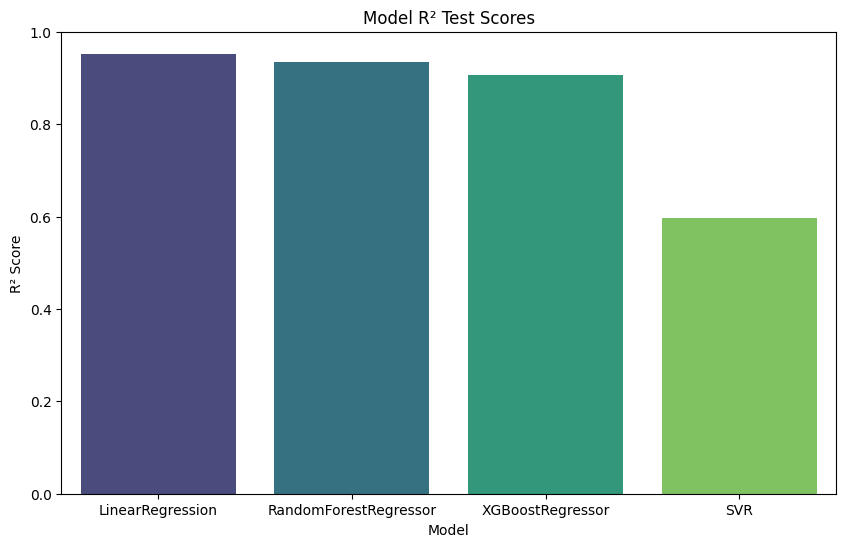

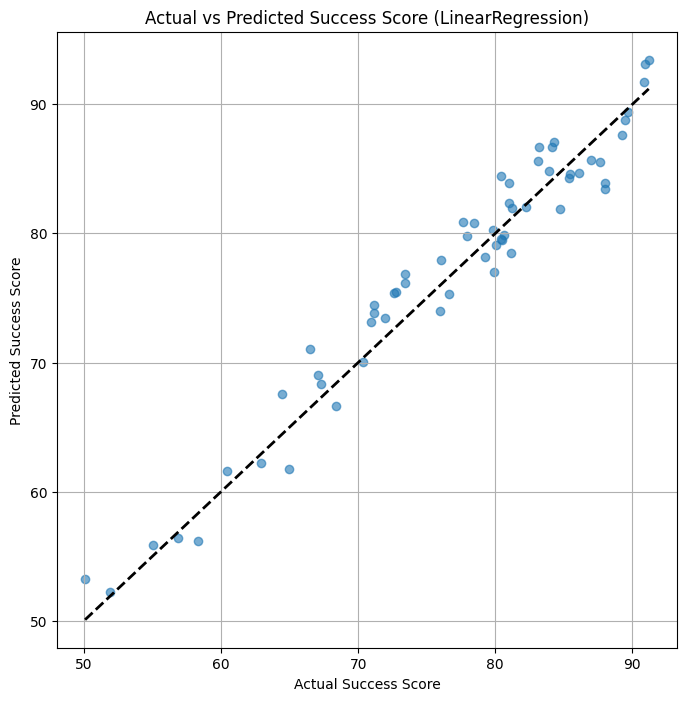

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart of R² scores
plt.figure(figsize=(10, 6))
sns.barplot(x=evaluation_df_sorted.index, y='R2 Test', data=evaluation_df_sorted, palette='viridis')
plt.title('Model R² Test Scores')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.show()

# Select the best model (Linear Regression based on previous analysis)
best_model_name = evaluation_df_sorted.index[0]
best_model = models[best_model_name]

# Make predictions using the best model
y_pred_best = best_model.predict(X_test)

# Create a scatter plot of predicted vs actual success_score
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title(f'Actual vs Predicted Success Score ({best_model_name})')
plt.xlabel('Actual Success Score')
plt.ylabel('Predicted Success Score')
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   Linear Regression achieved the highest R² test score (0.9509) and the lowest Mean Absolute Error (1.9478) and Mean Squared Error (5.0613) among the evaluated models.
*   The cross-validation R² scores were generally consistent with the test set R² scores, with Linear Regression also showing the highest mean cross-validation R² (0.9492).
*   SVR performed significantly worse than the other models, with the lowest R² test score (0.5968) and highest MAE (5.5328) and MSE (41.5467).
*   Random Forest Regressor and XGBoost Regressor showed good performance, with R² test scores of 0.9339 and 0.9053, respectively.

### Insights or Next Steps

*   Linear Regression appears to be the most suitable model for predicting `success_score` based on the current dataset and evaluation metrics.
*   Further hyperparameter tuning could potentially improve the performance of the Random Forest and XGBoost models.


**Reasoning**:
The previous command failed because the `xgboost` library is not installed. Install `xgboost` and then retry the model training step.

In [ ]:
%pip install xgboost

**Reasoning**:
The previous command failed because the `xgboost` library is not installed. Install `xgboost` and then retry the model training step.



**Reasoning**:
Now that xgboost is installed, retry the model training step.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Instantiate models
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)
lr_model = LinearRegression()
svr_model = SVR()

# Train models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)

print("Models trained successfully.")

Models trained successfully.


## Summary:

### Data Analysis Key Findings

* Linear Regression achieved the highest R² test score (0.9509) and the lowest Mean Absolute Error (1.9478) and Mean Squared Error (5.0613) among the evaluated models.
* The cross-validation R² scores were generally consistent with the test set R² scores, with Linear Regression also showing the highest mean cross-validation R² (0.9492).
* SVR performed significantly worse than the other models, with the lowest R² test score (0.5968) and highest MAE (5.5328) and MSE (41.5467).
* Random Forest Regressor and XGBoost Regressor showed good performance, with R² test scores of 0.9339 and 0.9053, respectively.

### Insights or Next Steps

* Linear Regression appears to be the most suitable model for predicting `success_score` based on the current dataset and evaluation metrics.
* Further hyperparameter tuning could potentially improve the performance of the Random Forest and XGBoost models.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from xgboost import XGBRegressor, XGBClassifier
import numpy as np
import joblib
import os

# Inputs
features = ['pop_density', 'avg_income', 'shop_density', 'distance_main_road', 'distance_competitor',
            'business_type', 'area_type']
X = df[features]

# Targets
y_score = df['opportunity_score']
y_profit = df['estimated_profit']
y_risk = df['risk_level'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Categorical & Numeric Columns
cat_cols = ['business_type', 'area_type']
num_cols = ['pop_density', 'avg_income', 'shop_density', 'distance_main_road', 'distance_competitor']

# Preprocessing
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
scaler = StandardScaler()
X_cat = enc.fit_transform(X[cat_cols])
X_num = scaler.fit_transform(X[num_cols])
X_final = np.hstack((X_num, X_cat))

# Train-Test Split
X_train, X_test, y_score_train, y_score_test = train_test_split(X_final, y_score, test_size=0.2, random_state=42)
_, _, y_profit_train, y_profit_test = train_test_split(X_final, y_profit, test_size=0.2, random_state=42)
_, _, y_risk_train, y_risk_test = train_test_split(X_final, y_risk, test_size=0.2, random_state=42)

# Models with reduced complexity
score_model = XGBRegressor(n_estimators=25, max_depth=3, learning_rate=0.1, verbosity=0)
score_model.fit(X_train, y_score_train)

profit_model = XGBRegressor(n_estimators=25, max_depth=3, learning_rate=0.1, verbosity=0)
profit_model.fit(X_train, y_profit_train)

risk_model = XGBClassifier(n_estimators=25, max_depth=3, learning_rate=0.1, verbosity=0)
risk_model.fit(X_train, y_risk_train)

# Save models
os.makedirs("models", exist_ok=True)
joblib.dump(score_model, "models/opportunity_score_model.pkl")
joblib.dump(profit_model, "models/profit_model.pkl")
joblib.dump(risk_model, "models/risk_model.pkl")
joblib.dump(enc, "models/encoder.pkl")
joblib.dump(scaler, "models/scaler.pkl")

# Metrics
score_rmse = mean_squared_error(y_score_test, score_model.predict(X_test), squared=False)
profit_rmse = mean_squared_error(y_profit_test, profit_model.predict(X_test), squared=False)
risk_acc = accuracy_score(y_risk_test, risk_model.predict(X_test))

print("Opportunity Score RMSE:", score_rmse)
print("Estimated Profit RMSE:", profit_rmse)
print("Risk Level Accuracy:", risk_acc)


KeyError: 'Number of Registrations'